In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [3]:
alphabets=['ऄ','अ','आ','इ','ई','उ','ऊ','ऋ','ऌ','ऍ','ऎ','ए','ऐ','ऑ','ऒ','ओ','औ','क','ख','ग','घ','ङ','च','छ','ज','झ','ञ','ट',
'ठ','ड','ढ','ण','त','थ','द','ध','न','ऩ','प','फ','ब','भ','म','य','र','ऱ','ल','ळ','ऴ','व','श','ष','स','ह']

vowels=['ऄ','अ','आ','इ','ई','उ','ऊ','ऋ','ऌ','ऍ','ऎ','ए','ऐ','ऑ','ऒ','ओ','औ','अ:']

consonant=['क','ख','ग','घ','ङ','च','छ','ज','झ','ञ','ट',
'ठ','ड','ढ','ण','त','थ','द','ध','न','ऩ','प','फ','ब','भ','म','य','र','ऱ','ल','ळ','ऴ','व','श','ष','स','ह']

matra=['ऀ','ँ','ं','ः','ऺ','ऻ','़','ा','ि','ी','ु','ू','ृ','ॄ','ॅ','ॆ','े','ै','ॉ','ॊ','ो','ौ','्','ॎ','ॏ','ॕ','ॖ','ॗ']

In [4]:
def tokenizing(lst_1):
    i=0
    lst_2=[]
    while i< (len(lst_1)-1):
        if lst_1[i]=='्':
            i+=1
            continue
        if lst_1[i] in consonant  and lst_1[i+1] in alphabets:
            lst_2.append(lst_1[i]+'्')
            lst_2.append('अ')
        else:
            if lst_1[i] in consonant:
                lst_2.append(lst_1[i]+'्')
            else:
                lst_2.append(lst_1[i])
        i=i+1
    lst_2.append(lst_1[i])
    if lst_1[i] in consonant:
        lst_2[-1]+='्'
        lst_2.append('अ')
    return lst_2

In [5]:
def regex(line):
    string=''
    for i in line:
        if i in alphabets+matra:
            string=string+i
        else:
            string=string+" "
    return " ".join(string.split())

In [6]:
def ngram_list(element_list,ngram=1,ngram_type='char'):
    ans_lst=[]
    ngram_word=''
    try:
        for i in range(len(element_list)-ngram+1):
            for j in range(ngram):
                ngram_word+=element_list[i]
                if ngram_type=='word':
                    ngram_word+=" "
                i+=1
            i -=ngram-1
            #print(eng_word)
            ans_lst.append(ngram_word.strip())
            ngram_word=''
        #lst.append(letters)
    except:
        print("out of bound",i)
    return ans_lst

In [7]:
def ngram_dict(ngram_elements,ngram_list):
    for pk in ngram_list:
        ngram_elements[pk] = ngram_elements.get(pk,0)+1
    return ngram_elements

In [8]:
#syllable
def syllable_list(word):  
    syl_list=[]
    oddtoken=[i for i in word]
    eventoken=[]
    for i in range(len(oddtoken)):
        if oddtoken[i] not in matra:
            eventoken.append(oddtoken[i])
        else:
            eventoken[-1]=eventoken[-1]+oddtoken[i]
    li=eventoken
    i=0
    while i<len(li):
        if li[i]!=li[i][0]+'्':
            #print(li[i])
            syl_list.append(li[i])
            i+=1
        else:
            flag=True
            s=''
            j=0
            while flag:
                if li[i]!=li[i][0]+'्':
                    flag=False
                    i=i+1
                else:
                    if j>=1:
                        s+=li[i+1]
                        j+=1
                    else:
                        j+=1
                        s+=li[i]+li[i+1]
                    i+=1
            syl_list.append(s)
            #print(s)
    return syl_list

In [9]:
def top100(ngram_dict,ngram_type,df):
    top100_ngram=[]
    top100_freq=[]
    i=0
    for key,val in ngram_dict.items():
        if i==100:
            break
        i+=1
        top100_ngram.append(key)
        top100_freq.append(val)
    df[ngram_type]=top100_ngram
    df[ngram_type+"freq"]=top100_freq
    return df

# Q.3a. Uni,Bi,Tri,Quad - grams for characters

In [9]:
import os

In [10]:
unigram_chars,bigram_chars,trigram_chars,quadgram_chars={},{},{},{}
for f in os.listdir("./New folder/"):
    print(f)
    file=open('./New folder/'+f,encoding='utf-8')
    for line in file:
        line=regex(line)
        line=line.split()
        for word in line:
            #print(word)
            word=tokenizing(word)
            
            #unigram characters
            unigrams_list=ngram_list(word)
            unigram_chars = ngram_dict(unigram_chars,unigrams_list)
            #unigram_chars = dict(Counter(unigrams_list)+Counter(unigram_chars))
                
            #bigram characters
            bigrams_list=ngram_list(word,2)
            bigram_chars = ngram_dict(bigram_chars,bigrams_list)
            #bigram_chars = dict(Counter(bigrams_list)+Counter(bigram_chars))
            
            #trigram characters
            trigrams_list=ngram_list(word,3)
            trigram_chars = ngram_dict(trigram_chars,trigrams_list)
            #trigram_chars = dict(Counter(trigrams_list)+Counter(trigram_chars))
            
            #quadgram characters
            quadgrams_list=ngram_list(word,4)
            quadgram_chars = ngram_dict(quadgram_chars,quadgrams_list)
            #quadgram_chars = dict(Counter(quadgrams_list)+Counter(quadgram_chars))
    file.close() 

xea.txt
1


In [30]:
#sorting and taking top 100 unigrams
unigram_chars = dict(sorted(unigram_chars.items(), key=lambda item: item[1],reverse=True))
ngram_char_df = top100(unigram_chars,"unigram",pd.DataFrame())
ngram_char_df

,unigram,unigramfreq
0,अ,1204929482
1,ा,463905851
2,क्,370114026
3,र्,352595202
4,े,339500129
5,्,230627080
6,ी,223131711
7,न्,222516167
8,स्,214494031
9,ि,207987632


In [31]:
#padding empty rows
lis = ['-']*20
df = pd.DataFrame({'unigram':lis,'unigramfreq':lis})
ngram_char_df = pd.concat([ngram_char_df,df],axis =0,ignore_index=True)
ngram_char_df

,unigram,unigramfreq
0,अ,1204929482
1,ा,463905851
2,क्,370114026
3,र्,352595202
4,े,339500129
5,्,230627080
6,ी,223131711
7,न्,222516167
8,स्,214494031
9,ि,207987632


In [23]:
#sorting and taking top 100 bigrams
bigram_chars = dict(sorted(bigram_chars.items(), key=lambda item: item[1],reverse=True))
print(len(bigram_chars))
ngram_char_df = top100(bigram_chars,"bigram",ngram_char_df)
ngram_char_df

3065


,unigram,unigramfreq,bigram,bigramfreq
0,अ,1204929482,र्अ,194845172
1,ा,463905851,अर्,130621419
2,क्,370114026,क्अ,101544672
3,र्,352595202,स्अ,86550856
4,े,339500129,न्अ,85931915
...,...,...,...,...
95,-,-,िस्,13988293
96,-,-,य्ो,13943630
97,-,-,न्ी,13429776
98,-,-,र्ो,13197242


In [24]:
#sorting and taking top 100 trigrams
trigram_chars = dict(sorted(trigram_chars.items(), key=lambda item: item[1],reverse=True))
print(len(trigram_chars))
ngram_char_df = top100(trigram_chars,"trigram",ngram_char_df)
ngram_char_df

64299


,unigram,unigramfreq,bigram,bigramfreq,trigram,trigramfreq
0,अ,1204929482,र्अ,194845172,अर्अ,81237768
1,ा,463905851,अर्,130621419,म्ें,43444137
2,क्,370114026,क्अ,101544672,क्अर्,35850203
3,र्,352595202,स्अ,86550856,ार्अ,30075023
4,े,339500129,न्अ,85931915,्र्अ,27316267
...,...,...,...,...,...,...
95,-,-,िस्,13988293,अड़्,6009446
96,-,-,य्ो,13943630,अण्अ,5999928
97,-,-,न्ी,13429776,ल्अग्,5958699
98,-,-,र्ो,13197242,ात्अ,5916618


In [25]:
#sorting and taking top 100 quadgrams
quadgram_chars = dict(sorted(quadgram_chars.items(), key=lambda item: item[1],reverse=True))
print(len(quadgram_chars))
ngram_char_df = top100(quadgram_chars,"quadgram",ngram_char_df)
ngram_char_df

564989


,unigram,unigramfreq,bigram,bigramfreq,trigram,trigramfreq,quadgram,quadgramfreq
0,अ,1204929482,र्अ,194845172,अर्अ,81237768,क्अर्अ,27060016
1,ा,463905851,अर्,130621419,म्ें,43444137,प्अर्अ,16622069
2,क्,370114026,क्अ,101544672,क्अर्,35850203,प््र्अ,14549040
3,र्,352595202,स्अ,86550856,ार्अ,30075023,अह्ीं,9313242
4,े,339500129,न्अ,85931915,्र्अ,27316267,ल्िएअ,8916864
...,...,...,...,...,...,...,...,...
95,-,-,िस्,13988293,अड़्,6009446,अह्ां,2464479
96,-,-,य्ो,13943630,अण्अ,5999928,ह्अल्े,2406819
97,-,-,न्ी,13429776,ल्अग्,5958699,ह्ोन्े,2361034
98,-,-,र्ो,13197242,ात्अ,5916618,उस्अक्,2353136


In [28]:
ngram_char_df.to_csv("top100_ngram_char.csv")
ngram_char_df

,unigram,unigramfreq,bigram,bigramfreq,trigram,trigramfreq,quadgram,quadgramfreq
0,अ,1204929482,र्अ,194845172,अर्अ,81237768,क्अर्अ,27060016
1,ा,463905851,अर्,130621419,म्ें,43444137,प्अर्अ,16622069
2,क्,370114026,क्अ,101544672,क्अर्,35850203,प््र्अ,14549040
3,र्,352595202,स्अ,86550856,ार्अ,30075023,अह्ीं,9313242
4,े,339500129,न्अ,85931915,्र्अ,27316267,ल्िएअ,8916864
5,्,230627080,अन्,71344778,अह्अ,25239334,न्अह्ी,8281249
6,ी,223131711,क्े,68261354,अन्अ,22912180,अर्अन्,7654125
7,न्,222516167,प्अ,67484036,प्अर्,22590890,अप्अन्,7041710
8,स्,214494031,अह्,65728270,अक्अ,19801110,क्ार्अ,6890907
9,ि,207987632,त्अ,59113822,प््र्,19530344,क्िय्ा,6217160


# Q.3b.unigrams, bigrams and trigrams for words

In [15]:
unigram_words,bigram_words,trigram_words,quadgram_words={},{},{},{}
for ik in os.listdir("./New folder/"):
    file=open('./New folder/'+ik,encoding='utf-8')
    for line in file:
        #print(line)
        
        #preprocessing
        line=regex(line)
        line=line.split()
        
        #unigram words
        unigram_list=ngram_list(line,1,'word')
        unigram_words=ngram_dict(unigram_words,unigram_list)
        
        #bigrams and trigrams not computed as my laptop is not supporting such intensive tasks
        """#bigram words
        bigram_list=ngram_list(line,2,'word')
        bigram_words=ngram_dict(bigram_words,bigram_list)
        
        #trigram words
        trigram_list=ngram_list(line,3,'word')
        trigram_words=ngram_dict(trigram_words,trigram_list)"""

        #print(line_num)
    file.close()

xea.txt


In [32]:
unigram_words=dict(sorted(unigram_words.items(), key=lambda item: item[1],reverse=True))
ngram_word_df = top100(unigram_words,"unigram",pd.DataFrame())
ngram_word_df

,unigram,unigramfreq
0,के,52891585
1,में,39758133
2,की,32016067
3,को,24302416
4,से,23050023
5,है,21999676
6,और,18993989
7,का,18262299
8,ने,17211918
9,पर,14740636


In [33]:
ngram_word_df.to_csv("top100_ngram_word.csv")

# Q.3c.unigrams, bigrams and trigrams for syllables.

In [19]:
unigram_syl,bigram_syl,trigram_syl,quadgram_syl={},{},{},{}
for ik in os.listdir("./New folder/"):
    file=open('./New folder/'+ik,encoding='utf-8')
    for line in file:
        
        line=regex(line)
        line=line.split()
        #print(line)
        for word in line:
            word_syl=syllable_list(word)
            #print(word_syl)
            
        #unigram characters
            unigrams_list=ngram_list(word_syl)
            #print(unigrams_list)
            unigram_syl = ngram_dict(unigram_syl,unigrams_list)
            #print(unigram_syl)
                
        #bigram characters
            bigrams_list=ngram_list(word_syl,2)
            #print(bigrams_list)
            bigram_syl = ngram_dict(bigram_syl,bigrams_list)
            #print(bigram_syl)
            
        #trigram characters
            trigrams_list=ngram_list(word_syl,3)
            #print(trigrams_list)
            trigram_syl = ngram_dict(trigram_syl,trigrams_list)
            #print(trigram_syl)
        
    file.close()

xea.txt


In [35]:
print(len(unigram_syl))
unigram_syl=dict(sorted(unigram_syl.items(), key=lambda item: item[1],reverse=True))
ngram_syl_df = top100(unigram_syl,"unigram",pd.DataFrame())
ngram_syl_df

51199


,unigram,unigramfreq
0,र,167334396
1,क,99188120
2,न,83952319
3,स,81410523
4,के,66324380
5,प,64911270
6,ने,54215539
7,ल,54187969
8,त,51303915
9,का,48674298


In [36]:
print(len(bigram_syl))
bigram_syl=dict(sorted(bigram_syl.items(), key=lambda item: item[1],reverse=True))
ngram_syl_df = top100(bigram_syl,"bigram",ngram_syl_df)
ngram_syl_df

968570


,unigram,unigramfreq,bigram,bigramfreq
0,र,167334396,कर,26674174
1,क,99188120,और,19235366
2,न,83952319,पर,16553219
3,स,81410523,इस,13814311
4,के,66324380,एक,9057431
5,प,64911270,लिए,9007964
6,ने,54215539,नहीं,7943881
7,ल,54187969,अप,7559334
8,त,51303915,कार,6457985
9,का,48674298,किया,6122686


In [37]:
print(len(trigram_syl))
trigram_syl=dict(sorted(trigram_syl.items(), key=lambda item: item[1],reverse=True))
ngram_syl_df = top100(trigram_syl,"trigram",ngram_syl_df)
ngram_syl_df

5872078


,unigram,unigramfreq,bigram,bigramfreq,trigram,trigramfreq
0,र,167334396,कर,26674174,करने,4973653
1,क,99188120,और,19235366,अपने,3584145
2,न,83952319,पर,16553219,सरका,3171445
3,स,81410523,इस,13814311,लेकिन,2771327
4,के,66324380,एक,9057431,उन्होंने,2747850
5,प,64911270,लिए,9007964,रकार,2710025
6,ने,54215539,नहीं,7943881,पहले,2393834
7,ल,54187969,अप,7559334,भारत,2205776
8,त,51303915,कार,6457985,अपनी,2119584
9,का,48674298,किया,6122686,करते,2117081


In [38]:
ngram_syl_df.to_csv("top100_ngram_syl.csv")

# Q.3.d  Zipfian distribution

For character unigrams

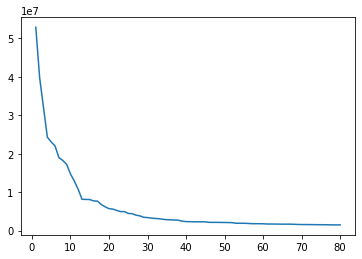

In [57]:
#character distribution
import matplotlib.pyplot as plt 
import numpy as np
x=np.array(list(range(1, 81)))
y=list(ngram_word_df["unigramfreq"])[:80]
y=np.array(list(map(int, y)))
plt.plot(x,y)
plt.show()

This frequency distribution for char unigram is similar to Zipfian distribution. So this follows Zips law

For Word Unigrams

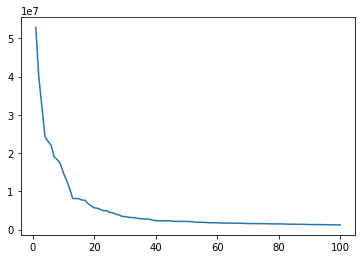

In [50]:
#word distribution
x=np.array(list(range(1, 101)))
y = list(map(int, list(ngram_word_df["unigramfreq"])))
y=np.array(y)
plt.plot(x,y)
plt.show()


This frequency distribution for word unigram is similar to Zipfian distribution. So this follows Zips law

For syllable unigrams

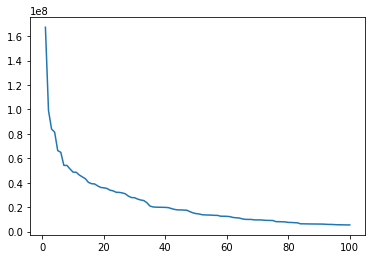

In [51]:
#Syllable distribution
x=np.array(list(range(1, 101)))
y = list(map(int, list(ngram_syl_df["unigramfreq"])))
y=np.array(y)
plt.plot(x,y)
plt.show()

This frequency distribution for syllable unigram is similar to Zipfian distribution. So this follows Zips law

In [11]:
unigram_chars,bigram_chars,trigram_chars,quadgram_chars={},{},{},{}
word = 'अंग्रेज'
word=tokenizing(word)
            
#unigram characters
unigrams_list=ngram_list(word)
unigram_chars = ngram_dict(unigram_chars,unigrams_list)
#unigram_chars = dict(Counter(unigrams_list)+Counter(unigram_chars))

#bigram characters
bigrams_list=ngram_list(word,2)
bigram_chars = ngram_dict(bigram_chars,bigrams_list)
#bigram_chars = dict(Counter(bigrams_list)+Counter(bigram_chars))

#trigram characters
trigrams_list=ngram_list(word,3)
trigram_chars = ngram_dict(trigram_chars,trigrams_list)
#trigram_chars = dict(Counter(trigrams_list)+Counter(trigram_chars))

#quadgram characters
quadgrams_list=ngram_list(word,4)
quadgram_chars = ngram_dict(quadgram_chars,quadgrams_list)
#quadgram_chars = dict(Counter(quadgrams_list)+Counter(quadgram_chars))

In [12]:
unigram_chars

{'अ': 2, 'ं': 1, 'ग्': 1, 'र्': 1, 'े': 1, 'ज्': 1}

In [13]:
bigram_chars

{'अं': 1, 'ंग्': 1, 'ग्र्': 1, 'र्े': 1, 'ेज्': 1, 'ज्अ': 1}

In [14]:
trigram_chars

{'अंग्': 1, 'ंग्र्': 1, 'ग्र्े': 1, 'र्ेज्': 1, 'ेज्अ': 1}

In [15]:
quadgram_chars

{'अंग्र्': 1, 'ंग्र्े': 1, 'ग्र्ेज्': 1, 'र्ेज्अ': 1}

In [16]:
unigram_syl,bigram_syl,trigram_syl,quadgram_syl={},{},{},{}
#sylable
word = 'अंग्रेज'
word_syl=syllable_list(word)
#print(word_syl)

#unigram characters
unigrams_list=ngram_list(word_syl)
#print(unigrams_list)
unigram_syl = ngram_dict(unigram_syl,unigrams_list)
#print(unigram_syl)

#bigram characters
bigrams_list=ngram_list(word_syl,2)
#print(bigrams_list)
bigram_syl = ngram_dict(bigram_syl,bigrams_list)
#print(bigram_syl)

#trigram characters
trigrams_list=ngram_list(word_syl,3)
#print(trigrams_list)
trigram_syl = ngram_dict(trigram_syl,trigrams_list)
#print(trigram_syl)

In [17]:
unigram_syl

{'अं': 1, 'ग्रे': 1, 'ज': 1}

In [18]:
bigram_syl

{'अंग्रे': 1, 'ग्रेज': 1}

In [19]:
trigram_syl

{'अंग्रेज': 1}

In [20]:
quadgram_syl

{}